[  7.70205859e-10  -1.70680727e-05   4.20590057e-01  -1.02515505e+03]
[0, 998, 5796, 8682, 12579, 17143, 20990, 27078, 30644, 37350, 40932, 46895, 51378, 57346, 60097]
[-1025.1550470640409, -621.64044505135337, 989.17234655598395, 1843.9069420387664, 3097.7555981896544, 5049.331077384446, 7405.8685692347917, 13140.691155960805, 17999.298923290637, 31004.413857774594, 40413.773406210756, 60593.65997348466, 79986.553568965785, 112214.58066285052, 129779.78941017442]


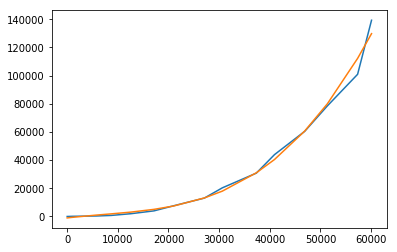

In [6]:
import numpy as np

import matplotlib.pyplot as plt

velocities = [
    0, 998, 5796, 8682, 12579, 17143, 20990, 27078, 30644, 37350, 40932, 46895, 51378, 57346, 60097,
]

stopping_distances = [
    0, 110, 350, 740, 1960, 3980, 7563, 13040, 20340, 30772, 43890, 60410, 78498, 100917, 139302,
]


npres = np.polyfit(velocities, stopping_distances, deg=3)

fitted_vals = list(map(lambda x: npres[0] * (x**3) + npres[1] * (x**2) + npres[2] * x + npres[3], velocities))
print(npres)

print(velocities)
print(fitted_vals)
'''
npres[0] * x^3 + npres[1] * x^2 + npres[2] * x + npres[3]
'''

plt.plot(velocities, stopping_distances)
plt.plot(velocities, fitted_vals)
plt.show()